In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Generating sample data
x= np.linspace(0,10,10) # x is an array of 10 equally spaced values between 0 and 10
y= np.sin(x)


In [3]:
#Define the degree
degree= 1

In [6]:
#Compute the knot vector
num_knots = len(x)+degree+1
t= np.linspace(0,1, num_knots - degree, endpoint = True)
t= np.concatenate(([0]*degree, t, [1]* degree))


In [7]:
#Compute the B-spline basis functions
def basis(i,k,t,x):
    if k==0:
        return 1.0 if t[i]<= x<t[i+1] else 0.0
    else:
        c1= 0.0 if t[i+k]==t[i] else (x-t[i])/t[i+k] - t[i] * basis(i, k-1, t, x)
        c2= 0.0 if t[i+k+1]==t[i+1] else (t[i+k+1]-x)/t[i+k+1] - t[i+1] * basis(i+1, k-1, t, x)
        return c1+c2

In [9]:
#Evaluate the BSpline basis functions
x_interpolated = np.linspace(x[0],x[-1],100)
y_interpolated = np.zeros_like(x_interpolated)
for i, x_val in enumerate(x_interpolated):
    for j in range(len(x)):
        y_interpolated[i] += y[j]* basis(j,degree,t,x_val)

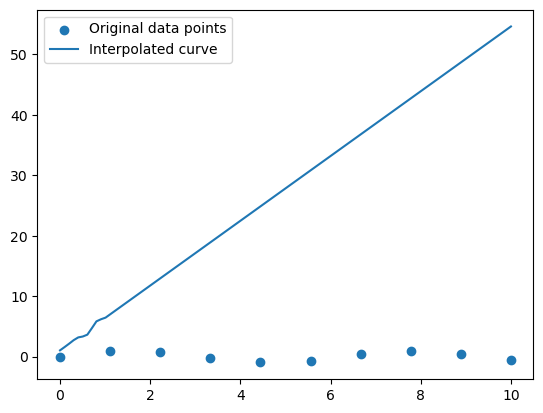

In [10]:
#plot the original data and the interpolated curve
plt.scatter(x,y, label="Original data points")
plt.plot(x_interpolated, y_interpolated, label="Interpolated curve")
plt.legend()
plt.show()
